<a href="https://colab.research.google.com/github/enzoampil/data-science-demos/blob/master/scraping/Scraping_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scraping 101

This is a practical tutorial on how to scrape websites where my goal is to teach you how to **effectively** scrape websites for your data projects.

In simple terms, *scraping* is just the process of getting data from websites, so that you can get some value from this information, whether it's for research, reports, your latest passion project, you name it!

## Kinds of scraping
Based on how I've been doing web scraping there are 3 main approaches:
1. Discovering and utilising existing APIs (w/ `requests`)
    1. Easiest and most reliable; although, depends on whether or not the API is *officially* released
2. Parsing html from a website (w/ `beautiful soup`)
    1. Beautiful soup allows you to easily parse through html like a `dict`
3. Creating a bot that surfs the net for you (w/ `selenium`)
    1. This is the most complicated and unwieldy approach
    2. It requires that you build an algorithm that `surfs` the internet like a person would

## Lesson 1: Discovering and utilising existing APIs (w/ `requests`)

Two kinds of APIs
1. **Official APIs** that are published with proper documentation - reading the docs are enough to know how to use it
2. **Unofficial APIs** that are not published but discoverable - you have to do some *detective work* to figure out how to use it (will discuss this in a later session)

## [Spoonacular's Food API](https://rapidapi.com/theapiguy/api/the-cocktail-db?endpoint=apiendpoint_680fb0e3-3684-43f2-8459-0c2dc0c13ddb) (Official)

In [0]:
import requests

url = "https://the-cocktail-db.p.rapidapi.com/search.php"

querystring = {"i":"vodka"}

headers = {
    'x-rapidapi-host': "the-cocktail-db.p.rapidapi.com",
    'x-rapidapi-key': "132fcdb492mshcfeb33bd11cb186p1c6f2cjsn35b062fc1cd8"
    }

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.json()['ingredients'])

[{'idIngredient': '1', 'strIngredient': 'Vodka', 'strDescription': 'Vodka is a distilled beverage composed primarily of water and ethanol, sometimes with traces of impurities and flavorings. Traditionally, vodka is made by the distillation of fermented cereal grains or potatoes, though some modern brands use other substances, such as fruits or sugar.\r\n\r\nSince the 1890s, the standard Polish, Russian, Belarusian, Ukrainian, Estonian, Latvian, Lithuanian and Czech vodkas are 40% alcohol by volume ABV (80 US proof), a percentage that is widely misattributed to Dmitri Mendeleev. The European Union has established a minimum of 37.5% ABV for any "European vodka" to be named as such. Products sold as "vodka" in the United States must have a minimum alcohol content of 40%. Even with these loose restrictions, most vodka sold contains 40% ABV. For homemade vodkas and distilled beverages referred to as "moonshine", see moonshine by country.\r\n\r\nVodka is traditionally drunk neat (not mixed w

In [0]:
def get_ingredient_description(query):
    url = "https://the-cocktail-db.p.rapidapi.com/search.php"

    querystring = {"i":query}

    headers = {
        'x-rapidapi-host': "the-cocktail-db.p.rapidapi.com",
        'x-rapidapi-key': "132fcdb492mshcfeb33bd11cb186p1c6f2cjsn35b062fc1cd8"
        }

    response = requests.request("GET", url, headers=headers, params=querystring)

    return response.json()['ingredients'][0]['strDescription']

In [0]:
get_ingredient_description('vodka')

'Vodka is a distilled beverage composed primarily of water and ethanol, sometimes with traces of impurities and flavorings. Traditionally, vodka is made by the distillation of fermented cereal grains or potatoes, though some modern brands use other substances, such as fruits or sugar.\r\n\r\nSince the 1890s, the standard Polish, Russian, Belarusian, Ukrainian, Estonian, Latvian, Lithuanian and Czech vodkas are 40% alcohol by volume ABV (80 US proof), a percentage that is widely misattributed to Dmitri Mendeleev. The European Union has established a minimum of 37.5% ABV for any "European vodka" to be named as such. Products sold as "vodka" in the United States must have a minimum alcohol content of 40%. Even with these loose restrictions, most vodka sold contains 40% ABV. For homemade vodkas and distilled beverages referred to as "moonshine", see moonshine by country.\r\n\r\nVodka is traditionally drunk neat (not mixed with any water, ice, or other mixer), though it is often served chil

In [0]:
get_ingredient_description('tequila')

'Tequila (Spanish pronunciation: [teˈkila] (About this sound listen)) is a regionally specific distilled beverage and type of alcoholic drink made from the blue agave plant, primarily in the area surrounding the city of Tequila, 65 km (40 mi) northwest of Guadalajara, and in the highlands (Los Altos) of the central western Mexican state of Jalisco. Aside from differences in region of origin, tequila is a type of mezcal (and the regions of production of the two drinks are overlapping). The distinction in the method of production is that tequila must use only blue agave plants rather than any type of agave. Tequila is commonly served neat in Mexico and as a shot with salt and lime across the rest of the world.\r\n\r\nThe red volcanic soil in the region around the city of Tequila is particularly well suited to the growing of the blue agave, and more than 300 million of the plants are harvested there each year. Agave grows differently depending on the region. Blue agaves grown in the highl

## Lesson 2: Get recipes by parsing html from a website, [allrecipes.com](https://www.allrecipes.com/?page=3) (w/ beautiful soup)



Step 1: Import `requests` and `beautifulsoup`

In [0]:
from bs4 import BeautifulSoup
import requests

Step 2: Get the html code from a target website using `requests`

In [0]:
res = requests.get('https://www.allrecipes.com/?')

In [0]:
res.text

'\r\n\r\n\r\n<!DOCTYPE html>\r\n<html lang="en-us">\r\n<head>\r\n    <title>Allrecipes | Food, friends, and recipe inspiration</title>\r\n\r\n<script src=\'https://secureimages.allrecipes.com/assets/deployables/v-1.185.0.5222/karma.bundled.js\' async=true></script>\r\n\r\n\r\n    <!--Make our website baseUrl available to the client-side code-->\r\n    <script type="text/javascript">\r\n        var AR = AR || {};\r\n\r\n        AR.segmentWriteKey = "RnmsxUrjIjM7W62olfjKgJrcsVlxe68V";\r\n        AR.baseWebsiteUrl = \'https://www.allrecipes.com\';\r\nwindow.dataLayer={"version":"1.0","pageInstanceId":"www.allrecipes.com/","externalLinkId":"","page":{"pageInfo":{"pageId":"","pageName":"/","destinationUrl":"https://www.allrecipes.com/","sysEnv":"RD0003FFB3A329","variant":"Control","version":"","issueDate":"02/08/2020 08:39:14","effectiveDate":"02/08/2020 08:39:14","domain":"www.allrecipes.com","parameters":{}},"category":{"primaryCategory":"home page","contentType":"home page","subContentTy

Step 3: Parse with Beautiful Soup

In [0]:
soup = BeautifulSoup(res.text, "html.parser")

In [0]:
articles = [a for a in soup.findAll(attrs={'class': 'fixed-recipe-card'}) if a.span.text not in ["\nWATCH\n"]]

In [0]:
articles[3]

<article class="fixed-recipe-card">
<ar-save-item class="favorite" data-id="277292" data-imageurl="'https://images.media-allrecipes.com/userphotos/300x300/7383694.jpg'" data-name='"Lemon-Blueberry Pancakes "' data-segmentpageproperties="segmentContentInfo" data-type="'Recipe'"></ar-save-item>
<div class="grid-card-image-container">
<a data-click-id="cardslot 6" data-content-provider-id="0" data-internal-referrer-link="popular" href="https://www.allrecipes.com/recipe/277292/lemon-blueberry-pancakes/">
<img alt="Lemon-Blueberry Pancakes  Recipe - Lemon-blueberry pancakes with juicy berries and tart lemon zest are delicious, and these are quick and easy to prepare for breakfast or brunch." class="fixed-recipe-card__img" data-lazy-load="" data-original-src="https://images.media-allrecipes.com/userphotos/300x300/7383694.jpg" src="https://images.media-allrecipes.com/ar/spacer.gif" style="display: inline;" title="Lemon-Blueberry Pancakes  Recipe">
</img></a>
</div>
<div class="fixed-recipe-ca

Article title

In [0]:
articles[0].span.text

'Healthier Swedish Meatballs'

In [0]:
recipe_titles = [article.find_all('span')[0].text for article in articles]


In [0]:
recipe_titles

['Healthier Swedish Meatballs',
 'Parmesan-Crusted Shrimp Scampi with Pasta',
 '"OG" Zuppa Toscana Soup',
 'Lemon-Blueberry Pancakes ',
 'Pork Chops in Garlic Mushroom Sauce',
 'Cajun Cabbage Soup',
 'Banana Breakfast Cookies',
 'Instant Pot® Italian Wedding Soup',
 'Garlic Top Sirloin Pot Roast',
 'Smothered Cabbage',
 'Mexican Frittata',
 'Easy Pork Chops for the Slow Cooker',
 'Slow Cooker Chili Queso Dip',
 'Perfect Chicken']

Article description

In [0]:
articles[0].find(attrs={'class': "fixed-recipe-card__description"}).text

'Greek yogurt, ground sirloin, and ground pork shine in this healthier, lighter version of Swedish meatballs that delivers the same great taste.'

In [0]:
recipe_description = [article.find(attrs={'class': "fixed-recipe-card__description"}).text for article in articles]

In [0]:
recipe_description

['Greek yogurt, ground sirloin, and ground pork shine in this healthier, lighter version of Swedish meatballs that delivers the same great taste.',
 "Parmesan-crusted shrimp are paired with a garlic and white wine sauce and angel hair pasta for a next-level shrimp scampi dish that's easy and delicious.",
 'Made with Italian sausage and russet potatoes, this quick and easy recipe is a perfect copycat of Olive Garden\'s(R) "Zuppa Toscana soup."',
 'Lemon-blueberry pancakes with juicy berries and tart lemon zest are delicious, and these are quick and easy to prepare for breakfast or brunch.',
 "Simmering boneless pork chops in a garlicky mushroom sauce is a great dinner idea for Valentine's Day.",
 'Creole seasoning gives this sausage and cabbage soup a spicy kick; serve with sourdough bread and more salsa, as desired.',
 'This easy banana variation on breakfast cookies makes a great alternative to pricey store-bought granola bars!',
 'Meatballs, pasta, and cheese are a marriage made in h

Article ratings

In [0]:
articles[0].find_all('span')[1]

<span aria-label="Rated 0 out of 5 stars" class="stars stars-0" data-ratingstars="0" onclick="AnchorScroll('reviews')"></span>

In [0]:
recipe_ratings = [article.find_all('span')[1]['data-ratingstars'] for article in articles]

In [0]:
recipe_ratings

['0',
 '4.42999982833862',
 '4.80000019073486',
 '4.36999988555908',
 '4.6100001335144',
 '4.6100001335144',
 '4.1399998664856',
 '4.96000003814697',
 '4.25',
 '4.53000020980835',
 '4.46000003814697',
 '4.42000007629395',
 '4.73999977111816',
 '4.67000007629395']

Putting them all together

In [0]:
import pandas as pd
recipes_df = pd.DataFrame({'title': recipe_titles, 'description': recipe_description, 'rating': recipe_ratings})

In [0]:
recipes_df

,title,description,rating
0,Healthier Swedish Meatballs,"Greek yogurt, ground sirloin, and ground pork ...",0
1,Parmesan-Crusted Shrimp Scampi with Pasta,Parmesan-crusted shrimp are paired with a garl...,4.42999982833862
2,"""OG"" Zuppa Toscana Soup","Made with Italian sausage and russet potatoes,...",4.80000019073486
3,Lemon-Blueberry Pancakes,Lemon-blueberry pancakes with juicy berries an...,4.36999988555908
4,Pork Chops in Garlic Mushroom Sauce,Simmering boneless pork chops in a garlicky mu...,4.6100001335144
5,Cajun Cabbage Soup,Creole seasoning gives this sausage and cabbag...,4.6100001335144
6,Banana Breakfast Cookies,This easy banana variation on breakfast cookie...,4.1399998664856
7,Instant Pot® Italian Wedding Soup,"Meatballs, pasta, and cheese are a marriage ma...",4.96000003814697
8,Garlic Top Sirloin Pot Roast,"Sirloin roast seasoned with salt, pepper, papr...",4.25
9,Smothered Cabbage,Adding a ham hock and pork shank to this smoth...,4.53000020980835


Step 4: Analyze the data!

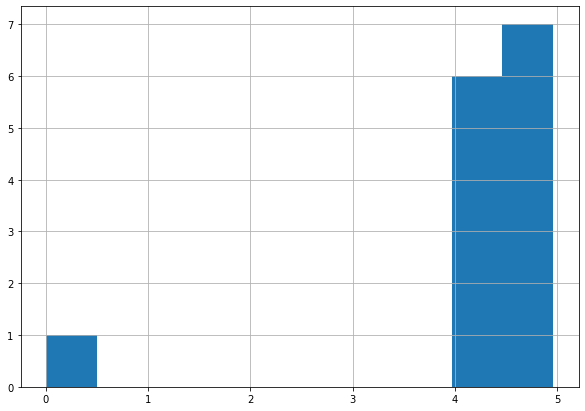

In [0]:
recipes_df.rating.astype(float).hist(figsize=(10, 7))

In [0]:
recipes_df.rating.describe()

count                  14
unique                 13
top       4.6100001335144
freq                    2
Name: rating, dtype: object

In [0]:
recipes_df.to_csv('recipes.csv', index=False)

Congratulations!

In [0]:
from google.colab import files

In [0]:
files.download('recipes.csv')